<a href="https://colab.research.google.com/github/linhsuan519/titanic-analysis/blob/main/4_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E7%9A%84%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC%E5%84%AA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(font_scale=1.00)
from sklearn.ensemble import RandomForestClassifier
# for display dataframe
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

A. 在資料分析的工作流程中，在不考慮準確度情況下有哪些必備的環節？
1. 取得資料 - 資料收集、讀取、儲存
2. 資料前處理 - 資料清理、型態轉換、資料探索、視覺化、特徵工程
3. 模型訓練
4. 模型評估
5. 應用決策

B. 接下來請在不考慮準確度的前提下完成 Baseline ，讓已讀入的資料完成必要的資料前處理的操作。

#載入資料
資料網址：https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv%EF%BC%89

In [620]:
import pandas as pd
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#觀察資料與評估資訊


In [621]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [622]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [623]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [624]:
cor = df.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


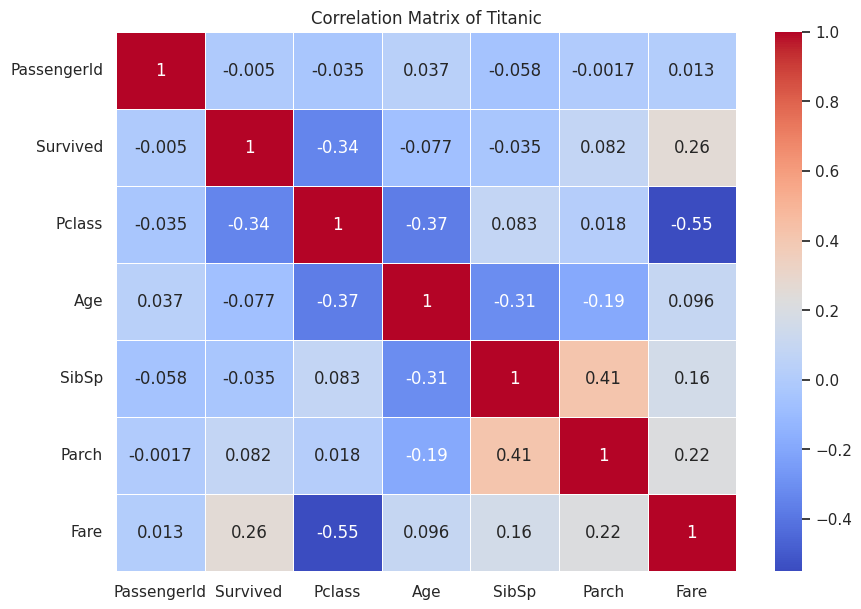

In [625]:
# 使用seaborn和matplotlib，視覺化呈現相關性
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cor,annot=True,linewidth=0.5,cmap='coolwarm')
plt.title('Correlation Matrix of Titanic')
plt.show()

#資料前處理
1.缺失項

2.對分析無幫助之資訊


In [626]:
titanic = df.copy()
titanic.dropna(inplace=True)
titanic.drop(columns=['Name','Ticket','Cabin'],axis=1,inplace=True)

3.轉換成可執行的資料(數值化)


In [627]:
# Sex直接轉換
titanic['Sex'] = titanic['Sex'].replace({'male':0,'female':1})

# Embarked使用OneHotEncoder
titanic = pd.get_dummies(titanic,columns=['Embarked'],dtype=int)

#模型分析

1.定義特徵欄位X、目標欄位Y，並完成訓練集資料

In [628]:
columns_X = set(titanic.columns) - {'Survived'}
columns_y = ['Survived']

train_X = titanic[columns_X]
train_y = titanic[columns_y]

2.使用 Logistic Regression 模型，進行交叉驗證以評估準確度

In [629]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log = LogisticRegression(random_state=0,max_iter=3000)
scores = cross_val_score(log,train_X,train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.75675676 0.86486486 0.72972973 0.66666667 0.69444444]
0.7424924924924925


#結論
精準度約為0.72




#優化_特徵
Age (20%missing)



In [630]:
df_data = df.copy()

In [631]:
#由於fare僅有一筆資料缺失，故以中位數補上
df_data['Fare']=df_data['Fare'].fillna(df_data['Fare'].median())

Sex,female,male,All
Has_Age,,,
0,53,124,177
1,261,453,714
All,314,577,891


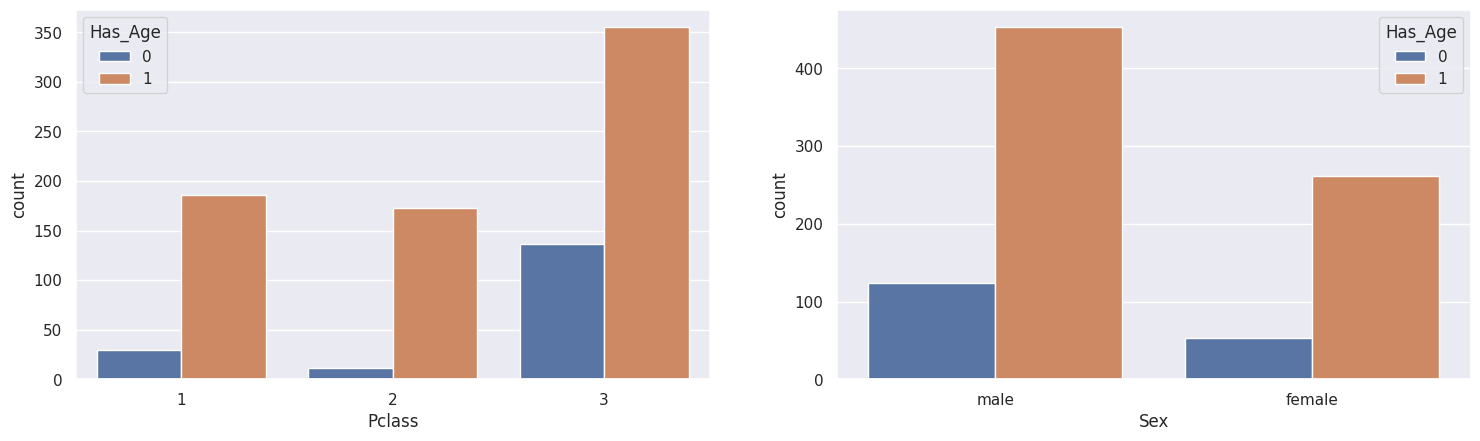

In [632]:
df_data['Has_Age'] = df_data['Age'].isnull().map(lambda x:0 if x == True else 1) #有缺=0
fig, [ax1,ax2] = plt.subplots(1,2)
fig.set_figwidth(18)
ax1 = sns.countplot(x=df_data['Pclass'],hue=df_data['Has_Age'],ax=ax1)
ax2 = sns.countplot(x=df_data['Sex'],hue=df_data['Has_Age'],ax=ax2)
pd.crosstab(df_data['Has_Age'],df_data['Sex'],margins=True).round(3)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


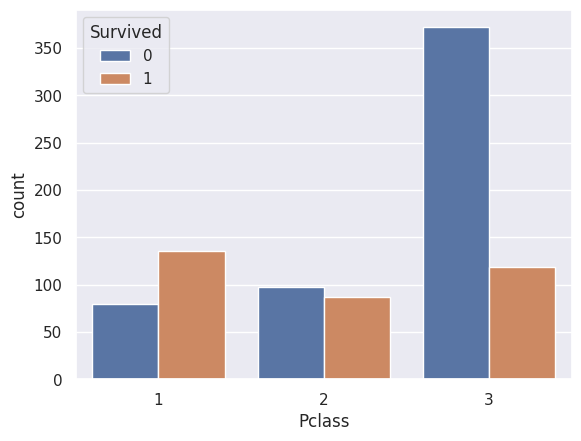

In [633]:
sns.countplot(x = df_data['Pclass'], hue=df_data['Survived'])
df_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()
#1,2,3號艙等生存率逐等遞減

,Sex,Survived
0,female,0.742038
1,male,0.188908


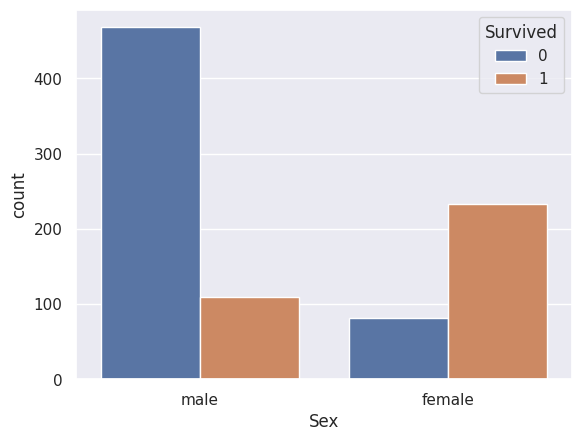

In [634]:
sns.countplot(x = df_data['Sex'],hue=df_data['Survived'])
display(df_data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean())

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


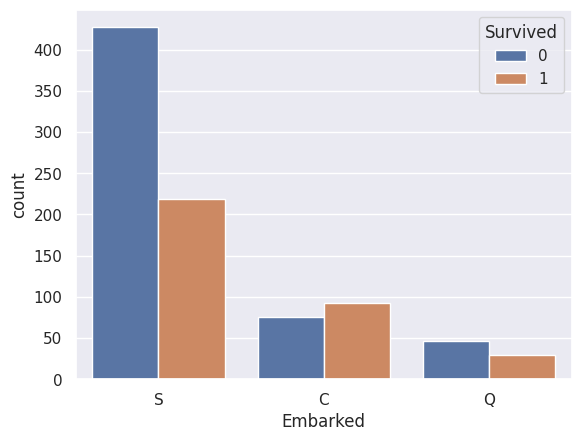

In [635]:
df_data['Embarked']=df_data['Embarked'].fillna('S') #以出發港口數最多的S補上缺失的資料
sns.countplot(x = df_data['Embarked'],hue=df_data['Survived'])
df_data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

In [636]:
#將性別與出發港口轉成數值，以代入模型訓練
df_data['Sex_Code']=df_data['Sex'].astype('category').cat.codes
df_data['Embarked_Code']=df_data['Embarked'].astype('category').cat.codes

In [637]:
#將訓練集與測試集分開
df_train = df_data[:len(df_train)]
df_test = df_data[len(df_train):]
#將Survivied設為標籤，並把'Survived','PassengerId'從訓練集中去除
X = df_train.drop(labels = ['Survived','PassengerId'], axis = 1)
Y = df_train['Survived']

In [638]:
#先以簡單的特徵建立一個簡單的訓練模型
#以目前結果為基準(0.82)，後續再逐步增加其他特徵，以避免將噪音過多的特徵值也參與訓練
Base = ['Pclass','Sex_Code','Embarked_Code']
Base_Model = RandomForestClassifier(random_state=2,n_estimators=100,min_samples_split=20,oob_score=True)
Base_Model.fit(X[Base], Y)
print('Base oob score :%.5f' %(Base_Model.oob_score_))

Base oob score :0.82514


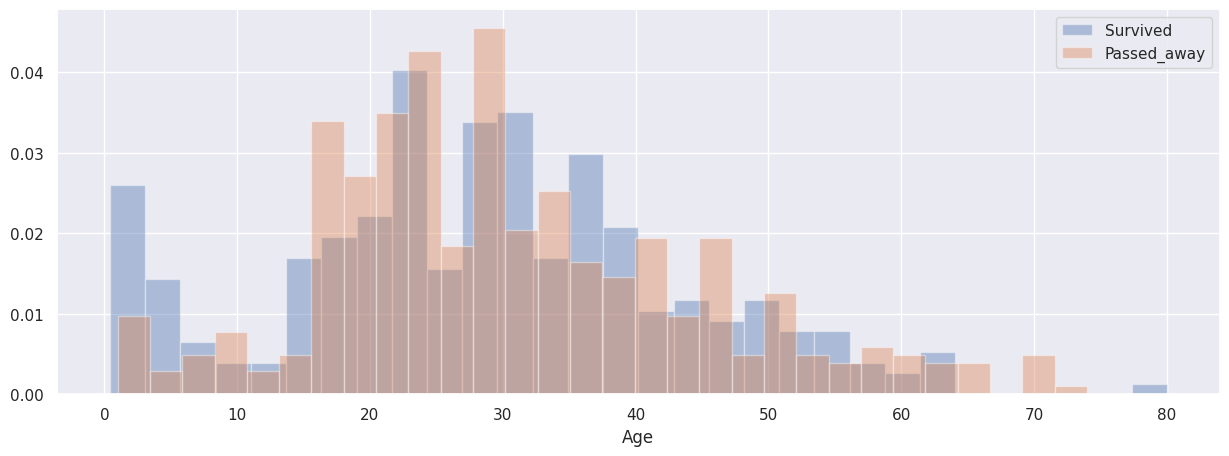

In [639]:
fig, ax = plt.subplots(figsize=[15,5])
Survived=df_data.Survived==1
Passed_away=df_data.Survived==0
ax =  sns.distplot(df_data.loc[Survived,'Age'], kde=False,norm_hist=True,bins=30,label='Survived')
ax =  sns.distplot(df_data.loc[Passed_away,'Age'], kde=False,norm_hist=True,bins=30,label='Passed_away')
ax.legend()
#可發現20~30歲的乘客存活率最低，小孩存活率則最高

Text(0.5, 1.0, 'Age vs Survived in Pclass1 1 & 2')

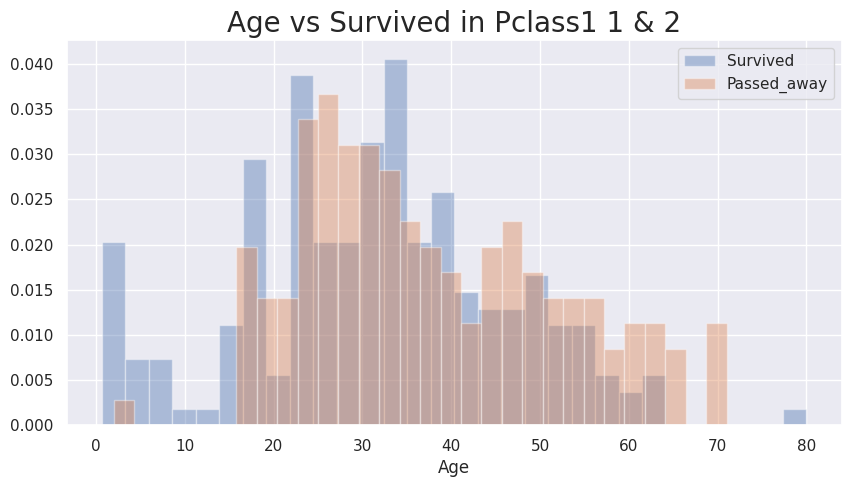

In [640]:
#從1,2號艙觀察年齡對存活率是否有影響，以判斷Age特徵的缺失對3號艙的影響
#從1,2號艙的資料看來，18歲以下的乘客生存率特別高之外，其他年齡曾似乎與存活率無明顯關聯
AP_Survived=((df_data.Has_Age == 1)&(df_data.Pclass != 3)&(df_data.Survived == 1))
AP_Passed_away=((df_data.Has_Age == 1) & (df_data.Pclass != 3) & (df_data.Survived == 0))
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.distplot(df_data.loc[AP_Survived,'Age'], kde=False,bins=30,norm_hist=True,label='Survived')
ax = sns.distplot(df_data.loc[AP_Passed_away,'Age'], kde=False,bins=30,norm_hist=True,label='Passed_away')
ax.legend()
ax.set_title('Age vs Survived in Pclass1 1 & 2',fontsize=20)

In [641]:
df_data['Age'].fillna(df['Age'].mode()[0],inplace=True)
Ti_pred = df_data
df_data['Ti_Age'] = df_data['Age']
df_data['Ti_Minor'] = ((df_data['Ti_Age'])<22.0)*1
df_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Age,Sex_Code,Embarked_Code,Ti_Age,Ti_Minor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,2,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,2,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,2,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,2,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,2,27.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,2,19.0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,2,24.0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,0,26.0,0


In [642]:
# splits again beacuse we just engineered new feature
df_train = df_data[: len(df_train)]
df_test = df_data[len(df_train): ]
# Training set and Labels
X = df_train.drop(labels=[ 'Survived', 'PassengerId'],axis=1)
Y = df_train['Survived']

In [643]:
minor = ['Sex_Code','Pclass', 'Ti_Minor','Embarked_Code']
minor_Model =RandomForestClassifier(random_state=2,n_estimators=250,min_samples_split=20,oob_score=True)
minor_Model.fit(X[minor], Y)
print('minor oob score :%.5f' %(minor_Model.oob_score_))

minor oob score :0.83607


#結論
* 分群年齡16 : 0.77596
* 分群年齡17 : 0.78689
* 分群年齡18 : 0.78689
* 分群年齡19 : 0.83607
* 分群年齡20 : 0.83607
* 分群年齡21 : 0.84153
* 分群年齡22 : 0.83607
**21歲以下的存活率較高**




